In [1]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as st
import seaborn as sns
import math
from math import trunc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
bikers_data=pd.read_csv('NYC_Bicycle_Counts_2016_Corrected.csv')
columns=list(bikers_data.columns)
rows=len(bikers_data)
top_data=bikers_data.head()
tail_data=bikers_data.tail()
top_data.style

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,1-Apr,Friday,78.100000,66.000000,0.01,"1,704","3,126","4,115","2,552","11,497"
1,2-Apr,Saturday,55.000000,48.900000,0.15,827,"1,646","2,565","1,884","6,922"
2,3-Apr,Sunday,39.900000,34.000000,0.09,526,"1,232","1,695","1,306","4,759"
3,4-Apr,Monday,44.100000,33.100000,0.47 (S),521,"1,067","1,440","1,307","4,335"
4,5-Apr,Tuesday,42.100000,26.100000,0,"1,416","2,617","3,081","2,357","9,471"


In [3]:
print(bikers_data.dtypes)
bikers_data = bikers_data.replace(',','',regex=True)
select_column = bikers_data.select_dtypes(object).columns
bikers_data[select_column]=bikers_data[select_column].apply(pd.to_numeric,errors='coerce')
bikers_data.drop(["Date","Day"],axis=1,inplace=True)
bikers_data.describe()

Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge         object
Manhattan Bridge        object
Williamsburg Bridge     object
Queensboro Bridge       object
Total                   object
dtype: object


,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,214.000000,214.000000,195.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.933645,61.972430,0.117282,3030.700935,5052.233645,6160.873832,4300.724299,18544.532710
std,12.545418,11.670566,0.268987,1134.044825,1745.485407,1910.643106,1260.985725,5702.083786
min,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,66.050000,53.225000,0.000000,2387.750000,3713.250000,4884.500000,3495.750000,14825.750000
50%,78.100000,64.900000,0.000000,3076.500000,5132.000000,6334.500000,4342.500000,19001.500000
75%,84.900000,71.100000,0.085000,3685.250000,6609.500000,7858.000000,5308.500000,23253.500000
max,96.100000,82.000000,1.650000,8264.000000,9152.000000,9148.000000,6392.000000,28437.000000


In [4]:
stats=bikers_data.describe()
Bridges=['Brooklyn Bridge','Manhattan Bridge','Williamsburg Bridge','Queensboro Bridge']
def convert_data_int(stat,Bridges_list):
  for x in range(len(Bridges)): 
    stat[Bridges[x]]=stat[Bridges[x]].astype(int)
  stat["Total"]=stat["Total"].astype(int) 
  return stat.style
convert_data_int(stats,Bridges)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,214.000000,214.000000,195.000000,214,214,214,214,214
mean,74.933645,61.972430,0.117282,3030,5052,6160,4300,18544
std,12.545418,11.670566,0.268987,1134,1745,1910,1260,5702
min,39.900000,26.100000,0.000000,504,997,1440,1306,4335
25%,66.050000,53.225000,0.000000,2387,3713,4884,3495,14825
50%,78.100000,64.900000,0.000000,3076,5132,6334,4342,19001
75%,84.900000,71.100000,0.085000,3685,6609,7858,5308,23253
max,96.100000,82.000000,1.650000,8264,9152,9148,6392,28437


In [5]:
mean_list,std_list,range_list=[],[],[]
for i in range(0,len(Bridges)):
  mean=np.mean(bikers_data[Bridges[i]])
  standard_deviation=np.std(bikers_data[Bridges[i]])
  mean_list.append(int(mean))
  std_list.append(int(standard_deviation))
for j in range(0,len(mean_list)):
  range1=mean_list[j]+std_list[j]
  range2=mean_list[j]-std_list[j]
  range_list.append(range1)
  range_list.append(range2)

for k in range(0,len(Bridges)):
  count=0
  if (k==0):
    c1=list(((bikers_data["Brooklyn Bridge"]<=range_list[k]) & (bikers_data["Brooklyn Bridge"]>=range_list[k+1])))
    for boolean_value in c1:
      if (boolean_value==True):
        count+=1
    percentage=(count/rows)*100
    print('Datapoints(Brooklyn) within 1 standard deviation: {}'.format(count)) 
    print('Percentage of datapoints within 1 standard deviation: {}'.format(percentage)) 
  if (k==1):
    c2=list(((bikers_data["Manhattan Bridge"]<=range_list[k+1]) & (bikers_data["Manhattan Bridge"]>=range_list[k+2])))
    for boolean_value in c2:
      if (boolean_value==True):
        count+=1
    percentage=(count/rows)*100
    print('\nDatapoints(Manhattan) within 1 standard deviation: {}'.format(count)) 
    print('Percentage of datapoints within 1 standard deviation: {}'.format(percentage)) 
  if (k==2):
    c3=((bikers_data["Williamsburg Bridge"]<=range_list[k+2]) & (bikers_data["Williamsburg Bridge"]>=range_list[k+3]))
    for boolean_value in c3:
      if (boolean_value==True):
        count+=1
    percentage=(count/rows)*100
    print('\nDatapoints(Williamsburg) within 1 standard deviation: {}'.format(count)) 
    print('Percentage of datapoints within 1 standard deviation: {}'.format(percentage)) 
  if (k==3):
    c4=((bikers_data["Queensboro Bridge"]<=range_list[k+3]) & (bikers_data["Queensboro Bridge"]>=range_list[k+4]))
    for boolean_value in c4:
      if (boolean_value==True):
        count+=1
    percentage=(count/rows)*100
    print('\nDatapoints(Queensboro) within 1 standard deviation: {}'.format(count)) 
    print('Percentage of datapoints within 1 standard deviation: {}'.format(percentage)) 

Datapoints(Brooklyn) within 1 standard deviation: 157
Percentage of datapoints within 1 standard deviation: 73.36448598130842

Datapoints(Manhattan) within 1 standard deviation: 125
Percentage of datapoints within 1 standard deviation: 58.41121495327103

Datapoints(Williamsburg) within 1 standard deviation: 134
Percentage of datapoints within 1 standard deviation: 62.616822429906534

Datapoints(Queensboro) within 1 standard deviation: 133
Percentage of datapoints within 1 standard deviation: 62.149532710280376


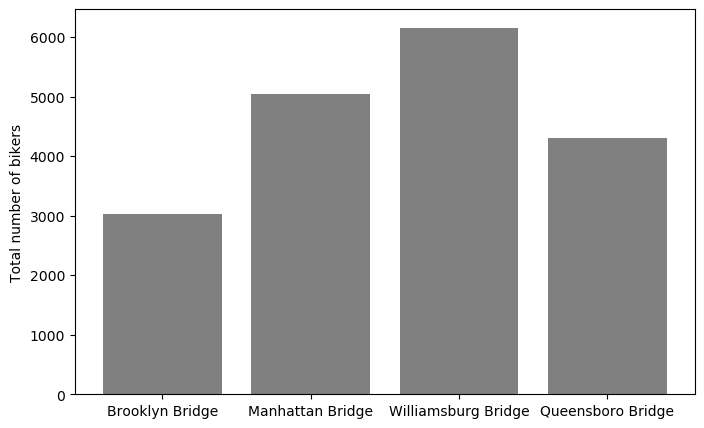

In [6]:
plt.figure(figsize=(8, 5))
bridges_data=[mean_list[0],mean_list[1],mean_list[2],mean_list[3]]
plt.bar(Bridges,bridges_data,color=['gray'])
plt.ylabel('Total number of bikers')
plt.show()

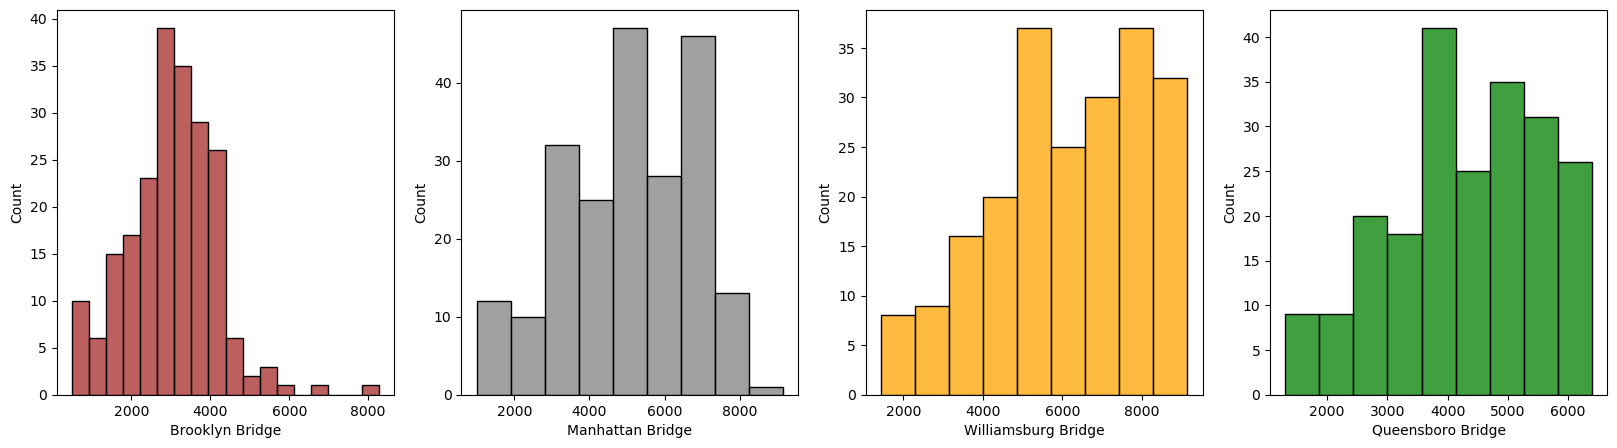

In [7]:
color_list=['brown','gray','orange','green']
plt.figure(figsize=(20, 5))
for iterate in range(0,len(Bridges)):
  plt.subplot(1,4,iterate+1)
  bridge_selection=(bikers_data[Bridges[iterate]])
  sns.histplot(bridge_selection,color=color_list[iterate])
plt.show()

In [8]:
condition1=((bikers_data['Brooklyn Bridge'] >=3030) & (bikers_data['Manhattan Bridge'] >=5052))
condition2=((bikers_data['Williamsburg Bridge'] >=6160) & (bikers_data['Queensboro Bridge'] >=4300))
conditional_data1=bikers_data.loc[(condition1)&(condition2)]
conditional_data1.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
17,81.0,52.0,0.0,3871,6823,7432,4964,23090
18,71.1,63.0,0.0,3501,6951,7834,5032,23318
19,68.0,50.0,0.0,3450,6574,7639,4928,22591
20,71.1,50.0,0.0,3436,6452,7426,4813,22127
24,66.9,54.0,0.0,3463,5978,6845,4564,20850


In [9]:
conditional_data1.tail()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
193,63.0,46.9,0.0,3184,6201,7227,4334,20946
195,66.9,55.0,NaN,3079,6171,7144,4379,20773
199,80.1,63.0,0.0,3465,6719,7731,4662,22577
200,81.0,66.9,0.0,4029,7594,8761,5098,25482
201,84.0,69.1,0.0,3966,7447,8582,5625,25620


In [10]:
conditional_stats=conditional_data1.describe()
convert_data_int(conditional_stats,Bridges)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,84.000000,84.000000,79.000000,84,84,84,84,84
mean,79.983333,65.236905,0.026582,3925,6669,7926,5402,23923
std,7.772594,8.184937,0.111538,794,759,700,553,2055
min,62.100000,46.900000,0.000000,3076,5077,6344,4309,19914
25%,73.900000,57.900000,0.000000,3446,6197,7422,5005,22166
50%,82.000000,66.900000,0.000000,3753,6833,7969,5361,23995
75%,86.000000,71.325000,0.000000,4125,7146,8514,5849,25655
max,95.000000,80.100000,0.620000,8264,9152,9148,6392,28437


In [11]:
Total_data1=conditional_data1["Total"]
def confidence(total_data):
  confidence_interval=0.95
  st_dev=np.std(total_data,ddof=1)
  total_mean=np.mean(total_data)
  std_error=st_dev/((len(total_data))**(1/2))
  z_sc=st.norm.ppf(1-(1-confidence_interval)/2)
  interval1=total_mean-(std_error*z_sc)
  interval2=total_mean+(std_error*z_sc)
  print('z-score value:',z_sc)
  print('Interval: [ '+str((math.trunc(interval1)))+','+str(math.trunc(interval2))+']')
  return 
confidence(Total_data1)

z-score value: 1.959963984540054
Interval: [ 23483,24362]


In [12]:
case1=((bikers_data['Brooklyn Bridge'] <3030) & (bikers_data['Manhattan Bridge'] <5052))
case2=((bikers_data['Williamsburg Bridge'] <6160) & (bikers_data['Queensboro Bridge'] <4300))
conditional_data2=bikers_data.loc[(case1)&(case2)]
conditional_data2.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,55.0,48.9,0.15,827,1646,2565,1884,6922
2,39.9,34.0,0.09,526,1232,1695,1306,4759
3,44.1,33.1,NaN,521,1067,1440,1307,4335
4,42.1,26.1,0.00,1416,2617,3081,2357,9471


In [13]:
conditional_data2.tail()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
209,54.0,41.0,1.41,651,1558,2137,1902,6248
210,46.9,44.1,0.00,2021,3872,4271,3202,13366
211,63.0,39.0,0.00,1639,3160,4027,2920,11746
212,75.0,57.9,0.56,1702,2971,3531,2547,10751
213,54.0,44.0,0.00,2648,4876,5440,3720,16684


In [14]:
conditional_stats2=conditional_data2.describe()
convert_data_int(conditional_stats2,Bridges)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,74.000000,74.000000,69.000000,74,74,74,74,74
mean,66.029730,55.262162,0.243333,1889,3223,4126,2950,12190
std,13.425214,12.469950,0.380003,693,1078,1200,796,3650
min,39.900000,26.100000,0.000000,504,997,1440,1306,4335
25%,57.000000,46.225000,0.000000,1493,2590,3497,2458,9798
50%,65.450000,54.500000,0.040000,1926,3272,4172,3002,12552
75%,76.500000,66.000000,0.290000,2500,4063,5138,3608,15265
max,96.100000,81.000000,1.650000,2975,5013,6093,4254,17837


In [15]:
total_data2=conditional_data2["Total"]
confidence(total_data2)

z-score value: 1.959963984540054
Interval: [ 11358,13021]


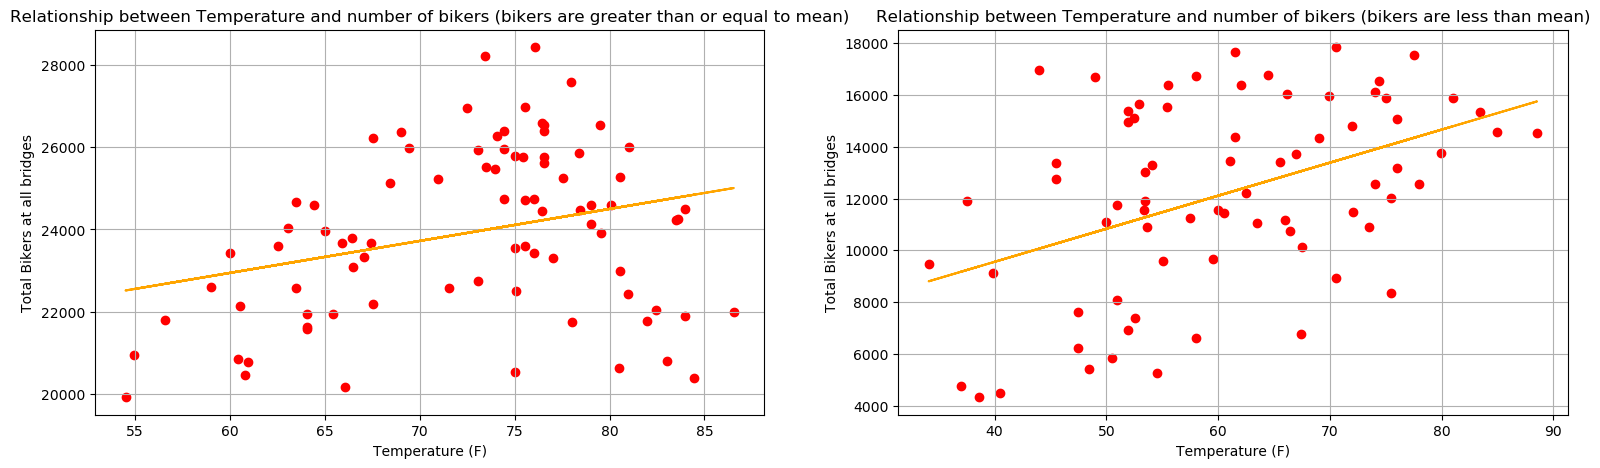

Correlation Fig(1,2,1): 0.29209860848629354
Correlation Fig(1,2,2): 0.4420328565685917


In [16]:
High_temp1=conditional_data1["High Temp (°F)"]
Low_temp1=conditional_data1["Low Temp (°F)"]
High_temp2=conditional_data2["High Temp (°F)"]
Low_temp2=conditional_data2["Low Temp (°F)"]
Average_high_low1= (High_temp1+Low_temp1)/2
Average_high_low2= (High_temp2+Low_temp2)/2
total_bikers1=conditional_data1["Total"]
total_bikers2=conditional_data2["Total"]
plt.figure(figsize=(19, 5))
plt.subplot(1,2,1)
plt.scatter(Average_high_low1,total_bikers1,color='red')
slope1,inter1=np.polyfit(Average_high_low1,total_bikers1,1)
plt.plot(Average_high_low1,slope1*Average_high_low1+inter1,color='orange')
plt.xlabel('Temperature (F)')
plt.ylabel('Total Bikers at all bridges')
plt.title('Relationship between Temperature and number of bikers (bikers are greater than or equal to mean)')
plt.grid()
plt.subplot(1,2,2)
plt.scatter(Average_high_low2,total_bikers2,color='red')
slope2,inter2=np.polyfit(Average_high_low2,total_bikers2,1)
plt.plot(Average_high_low2,slope2*Average_high_low2+inter2,color='orange')
plt.xlabel('Temperature (F)')
plt.ylabel('Total Bikers at all bridges')
plt.title('Relationship between Temperature and number of bikers (bikers are less than mean)')
plt.grid()
plt.show()
print('Correlation Fig(1,2,1):',Average_high_low1.corr(total_bikers1))
print('Correlation Fig(1,2,2):',Average_high_low2.corr(total_bikers2))

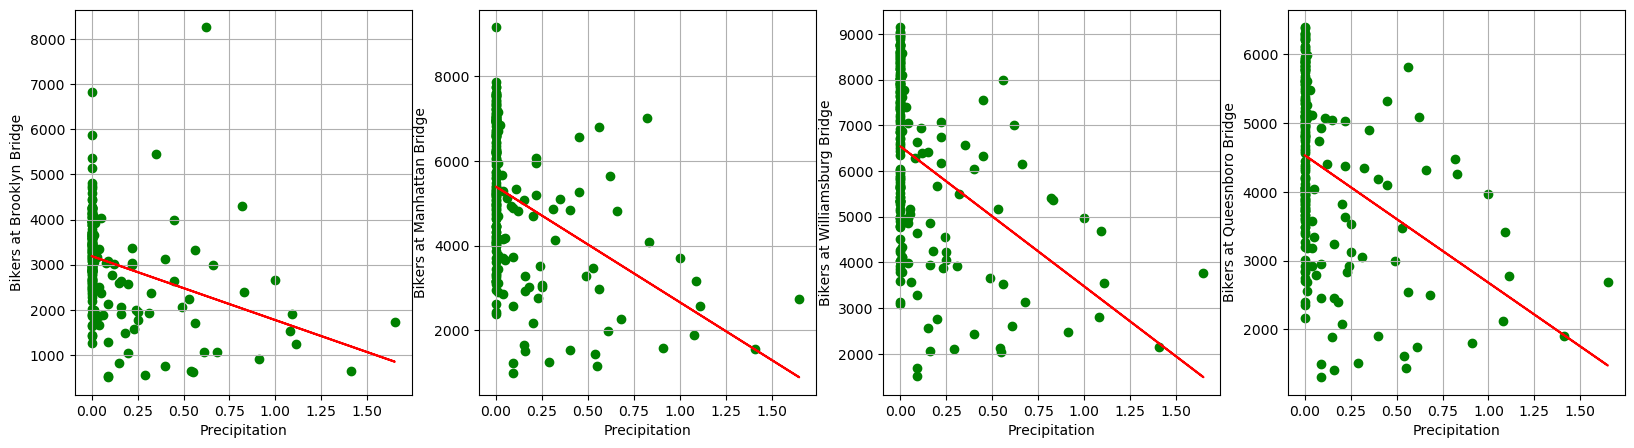


Equation 1: brooklyn_bikers= -1418.64*Precipitation + 3188.97

Equation 2: manhattan_bikers= -2722.83*Precipitation + 5389.45

Equation 3: williamsburg_bikers= -3061.78*Precipitation + 6538.28

Equation 4: queensboro_bikers= -1851.49*Precipitation + 4531.12

Correlation Fig(1,4,1): -0.3348207243792219

Correlation Fig(1,4,2): -0.4148010031135251

Correlation Fig(1,4,3): -0.4272161268152351

Correlation Fig(1,4,4): -0.3878380768827879


In [17]:
bikers_data=bikers_data.dropna()
Precipitation=bikers_data["Precipitation"]
Brooklyn_bikers=bikers_data["Brooklyn Bridge"]
Manhattan_bikers=bikers_data["Manhattan Bridge"]
Williamsburg_bikers=bikers_data["Williamsburg Bridge"]
Queensboro_bikers=bikers_data["Queensboro Bridge"]
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.scatter(Precipitation,Brooklyn_bikers,color='green')
gradient1,intercept1=np.polyfit(Precipitation,Brooklyn_bikers,1)
plt.plot(Precipitation,gradient1*Precipitation+intercept1,color='red')
plt.xlabel('Precipitation')
plt.ylabel('Bikers at Brooklyn Bridge')
plt.grid()
plt.subplot(1,4,2)
plt.scatter(Precipitation,Manhattan_bikers,color='green')
gradient2,intercept2=np.polyfit(Precipitation,Manhattan_bikers,1)
plt.plot(Precipitation,gradient2*Precipitation+intercept2,color='red')
plt.xlabel('Precipitation')
plt.ylabel('Bikers at Manhattan Bridge')
plt.grid()
plt.subplot(1,4,3)
plt.scatter(Precipitation,Williamsburg_bikers,color='green')
gradient3,intercept3=np.polyfit(Precipitation,Williamsburg_bikers,1)
plt.plot(Precipitation,gradient3*Precipitation+intercept3,color='red')
plt.xlabel('Precipitation')
plt.ylabel('Bikers at Williamsburg Bridge')
plt.grid()
plt.subplot(1,4,4)
plt.scatter(Precipitation,Queensboro_bikers,color='green')
gradient4,intercept4=np.polyfit(Precipitation,Queensboro_bikers,1)
plt.plot(Precipitation,gradient4*Precipitation+intercept4,color='red')
plt.xlabel('Precipitation')
plt.ylabel('Bikers at Queesnboro Bridge')
plt.grid()
plt.show()
print('\nEquation 1: brooklyn_bikers= {}*Precipitation + {}'.format(round(gradient1,2),round(intercept1,2)))
print('\nEquation 2: manhattan_bikers= {}*Precipitation + {}'.format(round(gradient2,2),round(intercept2,2)))
print('\nEquation 3: williamsburg_bikers= {}*Precipitation + {}'.format(round(gradient3,2),round(intercept3,2)))
print('\nEquation 4: queensboro_bikers= {}*Precipitation + {}'.format(round(gradient4,2),round(intercept4,2)))
print('\nCorrelation Fig(1,4,1):',Precipitation.corr(Brooklyn_bikers))
print('\nCorrelation Fig(1,4,2):',Precipitation.corr(Manhattan_bikers))
print('\nCorrelation Fig(1,4,3):',Precipitation.corr(Williamsburg_bikers))
print('\nCorrelation Fig(1,4,4):',Precipitation.corr(Queensboro_bikers))

0: No Precipitation
1: Precipitation

 Brooklyn Bridge
[0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0]
Accuracy: 79.49


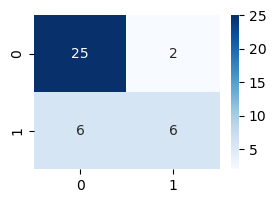


 Manhattan Bridge
[0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0]
Accuracy: 76.92


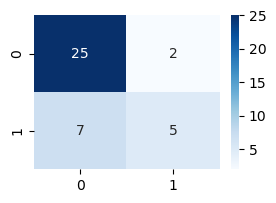


 Williamsburg Bridge
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy: 74.36


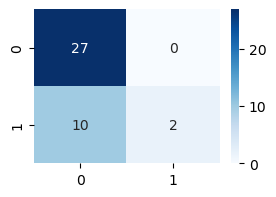


 Queensboro Bridge
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy: 71.79


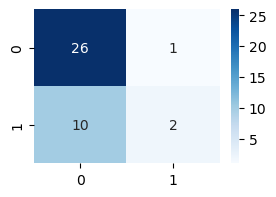

In [21]:
Precipitation_list=list(bikers_data["Precipitation"])
for iterate in range(0,len(Precipitation_list)):
    if (Precipitation_list[iterate]==0.00):
        Precipitation_list[iterate]=0
    else:
        Precipitation_list[iterate]=1
print('0: No Precipitation')
print('1: Precipitation')
for name_of_bridge in Bridges:
    plt.figure(figsize=(3, 2))
    conv_arr1=np.array(Precipitation_list)
    Precipitation=conv_arr1.reshape(-1,1)
    conv_arr2=np.array(bikers_data[name_of_bridge])
    num_bikers=conv_arr2.reshape(-1,1)
    [X_train, X_test, Y_train, Y_test]= train_test_split(num_bikers,Precipitation, test_size=0.20,random_state=0)
    reg_model = LogisticRegression(solver='liblinear')
    reg_model.fit(X_train, Y_train)
    prediction = reg_model.predict(X_test)
    matrix = confusion_matrix(Y_test, prediction)
    sns.heatmap(matrix, annot=True,cmap='Blues')
    print('\n {}\n{}'.format(name_of_bridge,prediction))
    print('Accuracy:',round((reg_model.score(X_test,Y_test))*100,2))
    plt.show()

0: No Precipitation
1: Precipitation

 Brooklyn Bridge
[0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1]
Accuracy: 69.23


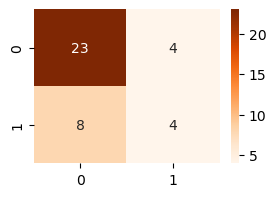


 Manhattan Bridge
[0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0]
Accuracy: 84.62


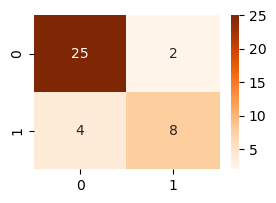


 Williamsburg Bridge
[0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0]
Accuracy: 76.92


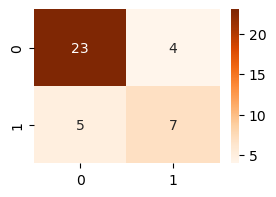


 Queensboro Bridge
[0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0]
Accuracy: 71.79


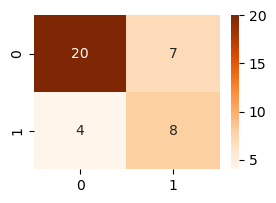

In [20]:
print('0: No Precipitation')
print('1: Precipitation')
for name_of_bridge in Bridges:
    plt.figure(figsize=(3, 2))
    conv_arr1=np.array(Precipitation_list)
    Precipitation=conv_arr1.reshape(-1,1)
    conv_arr2=np.array(bikers_data[name_of_bridge])
    num_bikers=conv_arr2.reshape(-1,1)
    [x_train, x_test, y_train, y_test] = train_test_split(num_bikers,Precipitation, test_size = 0.20, random_state = 0)
    KNN_classifier = KNeighborsClassifier(n_neighbors = 3)
    KNN_classifier.fit(x_train, y_train)  
    KNN_prediction = KNN_classifier.predict(x_test)
    print('\n {}\n{}'.format(name_of_bridge,KNN_prediction))
    sns.heatmap(confusion_matrix(y_test, KNN_prediction), annot=True,cmap='Oranges')
    print('Accuracy:',round((KNN_classifier.score(x_test,y_test))*100,2))
    plt.show()
    